In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output

%matplotlib inline

plt.style.use('default')
sns.set(style="whitegrid")
pd.options.display.float_format= '{:20,.2f}'.format

In [5]:
clicks= pd.read_csv('C:/Users/Lucas/Documents/Datos TP/clicks.csv.gzip',compression='gzip',engine='python')
#clicks['dia'] = pd.to_datetime(clicks['created']).dt.date
#clicks['hora'] = pd.to_datetime(clicks['created']).dt.time
#clicks.drop(['created'], axis=1, inplace=True)
clicks['created'] = pd.to_datetime(clicks['created'], format='%Y/%m/%d %H:%M')
clicks['dia'] = pd.to_datetime(clicks['created']).dt.date
clicks['hora'] = pd.to_datetime(clicks['created']).dt.time
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,...,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash,dia,hora
0,2,nan,4,2019-03-06 22:42:12.755000+00:00,6333597102633388268,1.21,1.07,False,1.00,iGgClCM9exiHF4K31g94XmvHEBSLKIY,...,"3,072,849,339,937,028,096.00",2733035977666442898,nan,1.56,0.91,0.08,1891515180541284343,1904083516767779093,2019-03-06,22:42:12.755000
1,0,nan,0,2019-03-08 10:24:30.641000+00:00,6333597102633388268,1.22,1.07,False,4.00,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,...,"1,774,085,102,589,090,048.00",392184377613098015,nan,nan,nan,nan,1891515180541284343,3086509764961796666,2019-03-08,10:24:30.641000
2,0,nan,0,2019-03-08 15:24:16.069000+00:00,6333597102633388268,1.21,1.07,False,6.00,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,...,"3,072,849,339,937,028,096.00",392184377613098015,nan,nan,0.95,0.47,1891515180541284343,6958163894863846647,2019-03-08,15:24:16.069000
3,2,nan,3,2019-03-06 03:08:51.543000+00:00,6333597102633388268,1.21,1.07,False,45.00,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,...,"3,072,849,339,937,028,096.00",2733035977666442898,nan,19.01,0.04,0.43,1891515180541284343,4368617728156436525,2019-03-06,03:08:51.543000
4,2,nan,3,2019-03-06 03:32:55.570000+00:00,6333597102633388268,1.21,1.07,False,45.00,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,...,"3,072,849,339,937,028,096.00",2733035977666442898,nan,28.11,0.05,0.42,1891515180541284343,4368617728156436525,2019-03-06,03:32:55.570000


In [6]:
clicks['hora']= (clicks['created'].dt.hour*100+ clicks['created'].dt.minute)

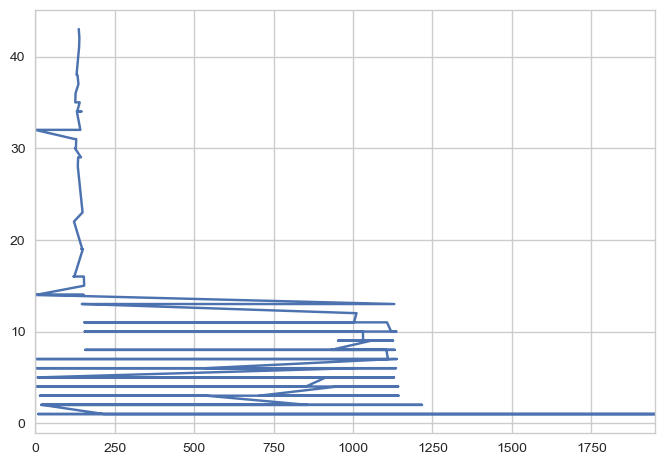

In [7]:
dia1= clicks[(clicks['dia'].astype('str')== '2019-03-08')]
dia1['hora'].value_counts().plot()

In [14]:
clicks['dia'] = pd.to_datetime(clicks['created']).dt.date
clicks['hora'] = pd.to_datetime(clicks['created']).dt.time
clicks['date'] = pd.to_datetime(clicks['dia'])
clicks = clicks.set_index('date')
clicks.drop(['dia'], axis=1, inplace=True)
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,...,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash,hora
date,,,,,,,,,,,,,,,,,,,,,
2019-03-06,2,nan,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.21,1.07,False,1.00,iGgClCM9exiHF4K31g94XmvHEBSLKIY,...,nan,"3,072,849,339,937,028,096.00",2733035977666442898,nan,1.56,0.91,0.08,1891515180541284343,1904083516767779093,22:42:12.755000
2019-03-08,0,nan,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.22,1.07,False,4.00,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,...,nan,"1,774,085,102,589,090,048.00",392184377613098015,nan,nan,nan,nan,1891515180541284343,3086509764961796666,10:24:30.641000
2019-03-08,0,nan,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.21,1.07,False,6.00,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,...,nan,"3,072,849,339,937,028,096.00",392184377613098015,nan,nan,0.95,0.47,1891515180541284343,6958163894863846647,15:24:16.069000
2019-03-06,2,nan,3,2019-03-06T03:08:51.543Z,6333597102633388268,1.21,1.07,False,45.00,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,...,nan,"3,072,849,339,937,028,096.00",2733035977666442898,nan,19.01,0.04,0.43,1891515180541284343,4368617728156436525,03:08:51.543000
2019-03-06,2,nan,3,2019-03-06T03:32:55.570Z,6333597102633388268,1.21,1.07,False,45.00,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,...,nan,"3,072,849,339,937,028,096.00",2733035977666442898,nan,28.11,0.05,0.42,1891515180541284343,4368617728156436525,03:32:55.570000


In [3]:
clicks['datetime'] = pd.to_datetime(clicks['created'])
clicks = clicks.set_index('datetime')
clicks.drop(['created'], axis=1, inplace=True)